In [1]:
# importing the necessary modules 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [5]:
"""
Import the dataset into a matrix using numpy. The dataset is space delimited 
with first column as labels and rest 10 as features.
"""
# Loading the data from the file.
data = np.genfromtxt('data.txt',delimiter='\t')
print(data[:5,:])

[[            nan  1.00000000e+00  2.00000000e+00  3.00000000e+00
   4.00000000e+00  5.00000000e+00  6.00000000e+00  7.00000000e+00
   8.00000000e+00  9.00000000e+00  1.00000000e+01]
 [ 2.00000000e+00  3.20100000e+00  5.77470148e+00  3.42927151e+00
   1.08731597e-01 -1.46594209e-01 -2.14001316e+00  8.02534733e+00
  -8.27368830e-02 -3.16597925e-01  8.97059470e+00]
 [ 1.00000000e+00  1.06600000e+00  5.19693458e-01  5.93631974e+00
   1.94728580e-01 -1.03153256e+00  6.78118588e-01  1.24088747e+01
  -5.72664120e-02  1.29536154e-01  6.40681803e+00]
 [ 2.00000000e+00  1.39500000e+00  6.18460515e+00  4.39392676e+00
   2.36127673e-01 -3.06629726e-01 -1.15258335e+00  1.22711878e+01
  -2.16143346e-01  6.54901697e-01  1.74256283e+01]
 [ 1.00000000e+00  6.20000000e-02  1.06773671e-01  2.27877344e-01
   2.41524643e-01 -1.73488285e+00 -2.11148336e+00  1.25319308e+01
   9.91367763e-01  1.28390220e-02  3.48737009e+00]]


In [3]:
# Assigning features to X and labels to y
X,y = data[:,1:],data[:,0]

In [4]:
print(X.shape, y.shape)

(1000, 10) (1000,)


In [6]:
# We will use a function to plot the data (two labels at a time)
def plotdata(a,b,X,y):
    # a and b are the labels to be printed
    
    # To get rid of the feature names, and headings
    X_copy = X[1:,:]
    y_copy = y[1:]
    
    
    one = y_copy == 1
    two = y_copy == 2
    # one and two are arrays which contain the info if y_copy has the label one or two like
    # one = [True, False, True.......  (say)]
    
    # Indexing of the array
    a-=1
    b-=1
    
    
    plt.plot(X_copy[one,a],X_copy[one,b],'ro')
    plt.plot(X_copy[two,a],X_copy[two,b],'bo')
   
    plt.xlabel('label '+str(a+1))
    plt.ylabel('label '+str(b+1))
    plt.title('Classification using labels '+str(a+1)+' and '+str(b+1))

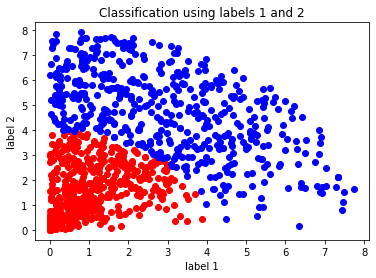

In [7]:
"""
Plot all features vs each other (2 at a time) using matplotlib - red for label 1 and blue for label 2, 
clearly denote the axes and the title of the plot along with proper markings (what does each axis represent)
on the axes.
"""
# first and second labels are plotted
plotdata(1,2,X,y)

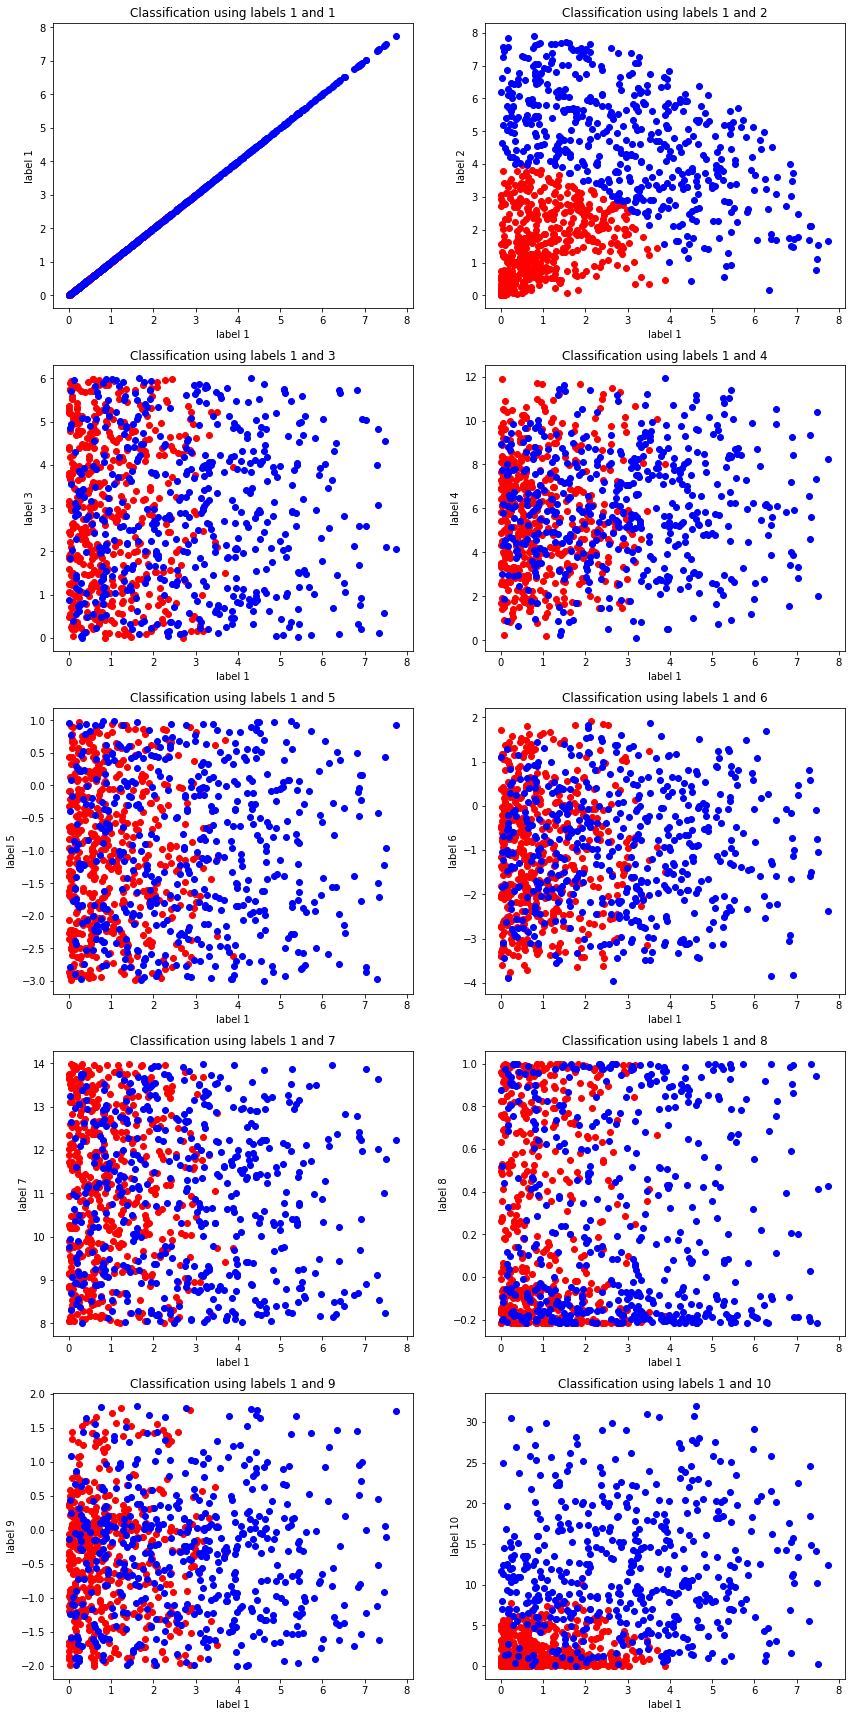

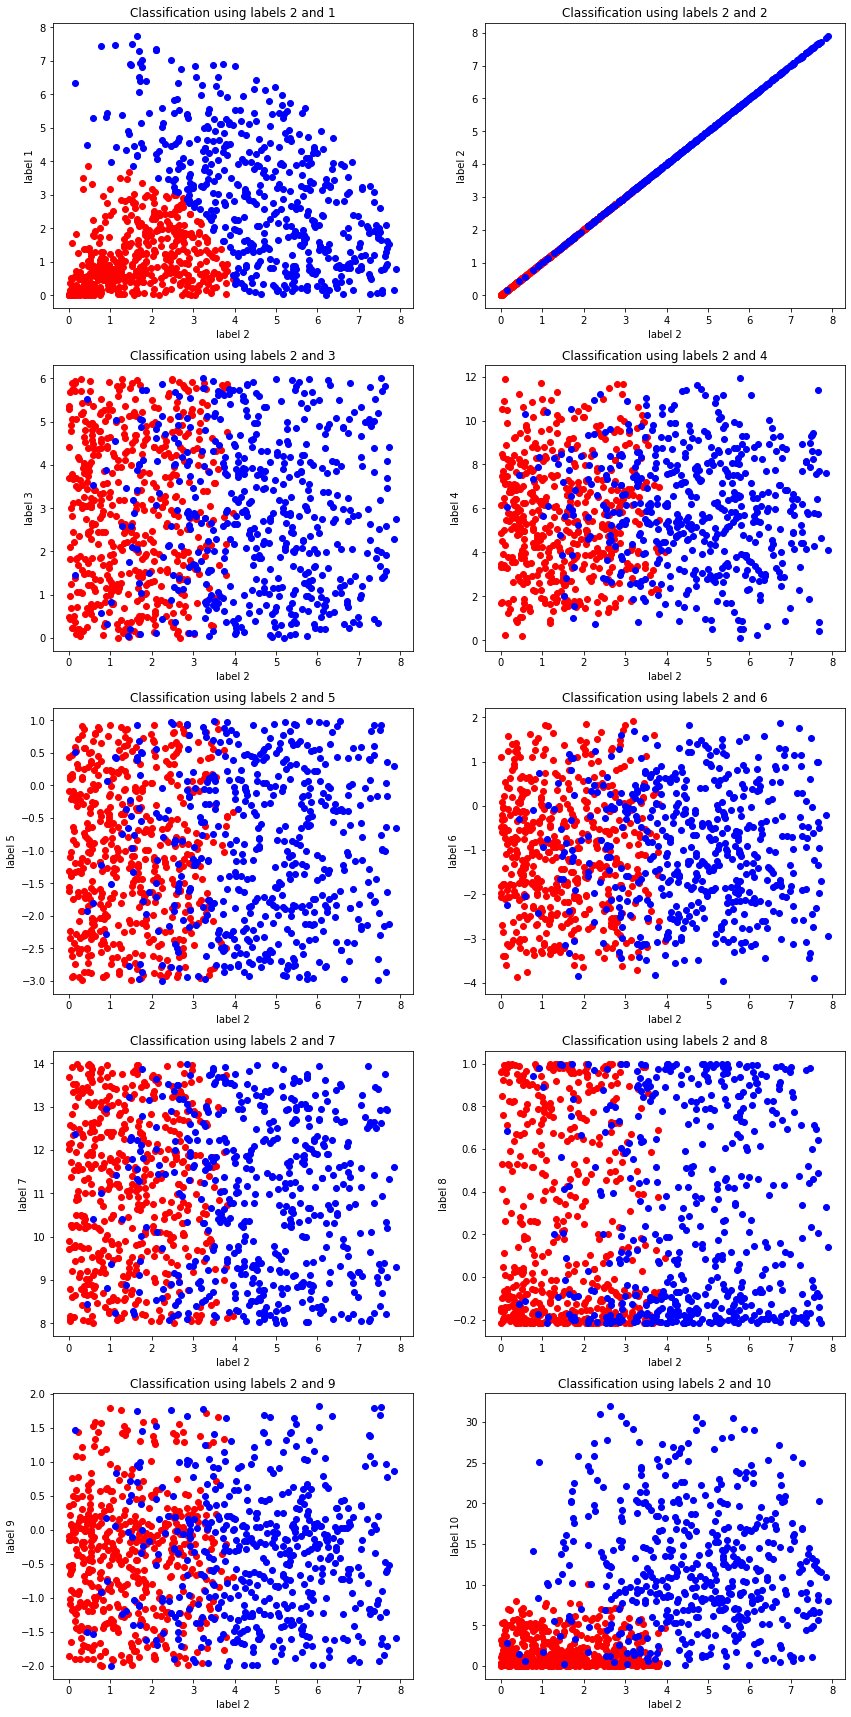

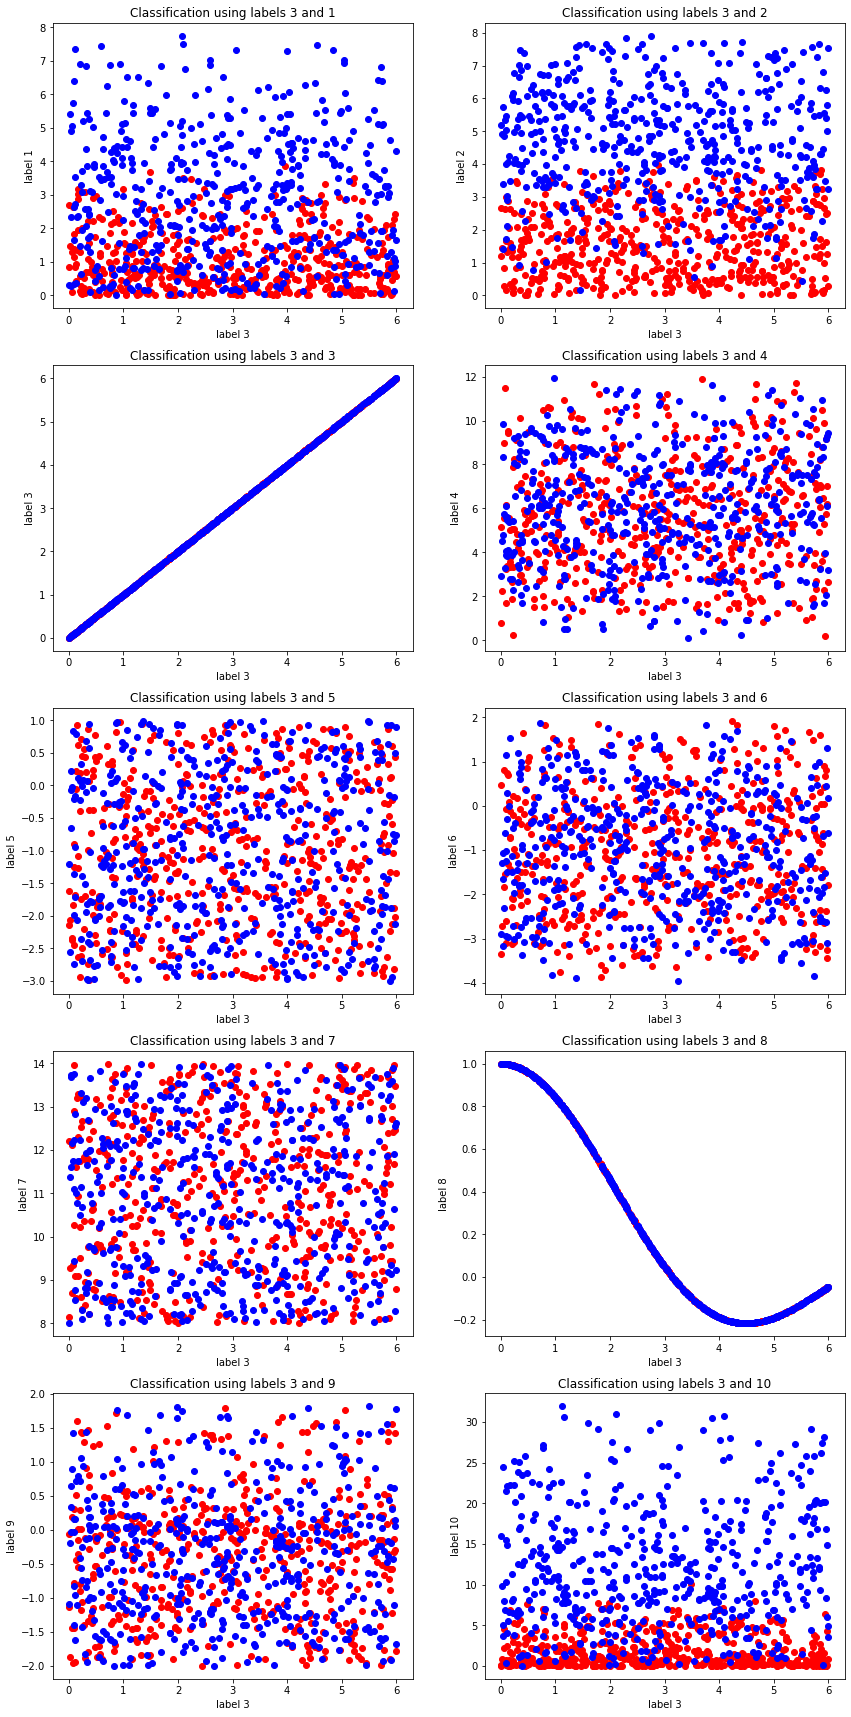

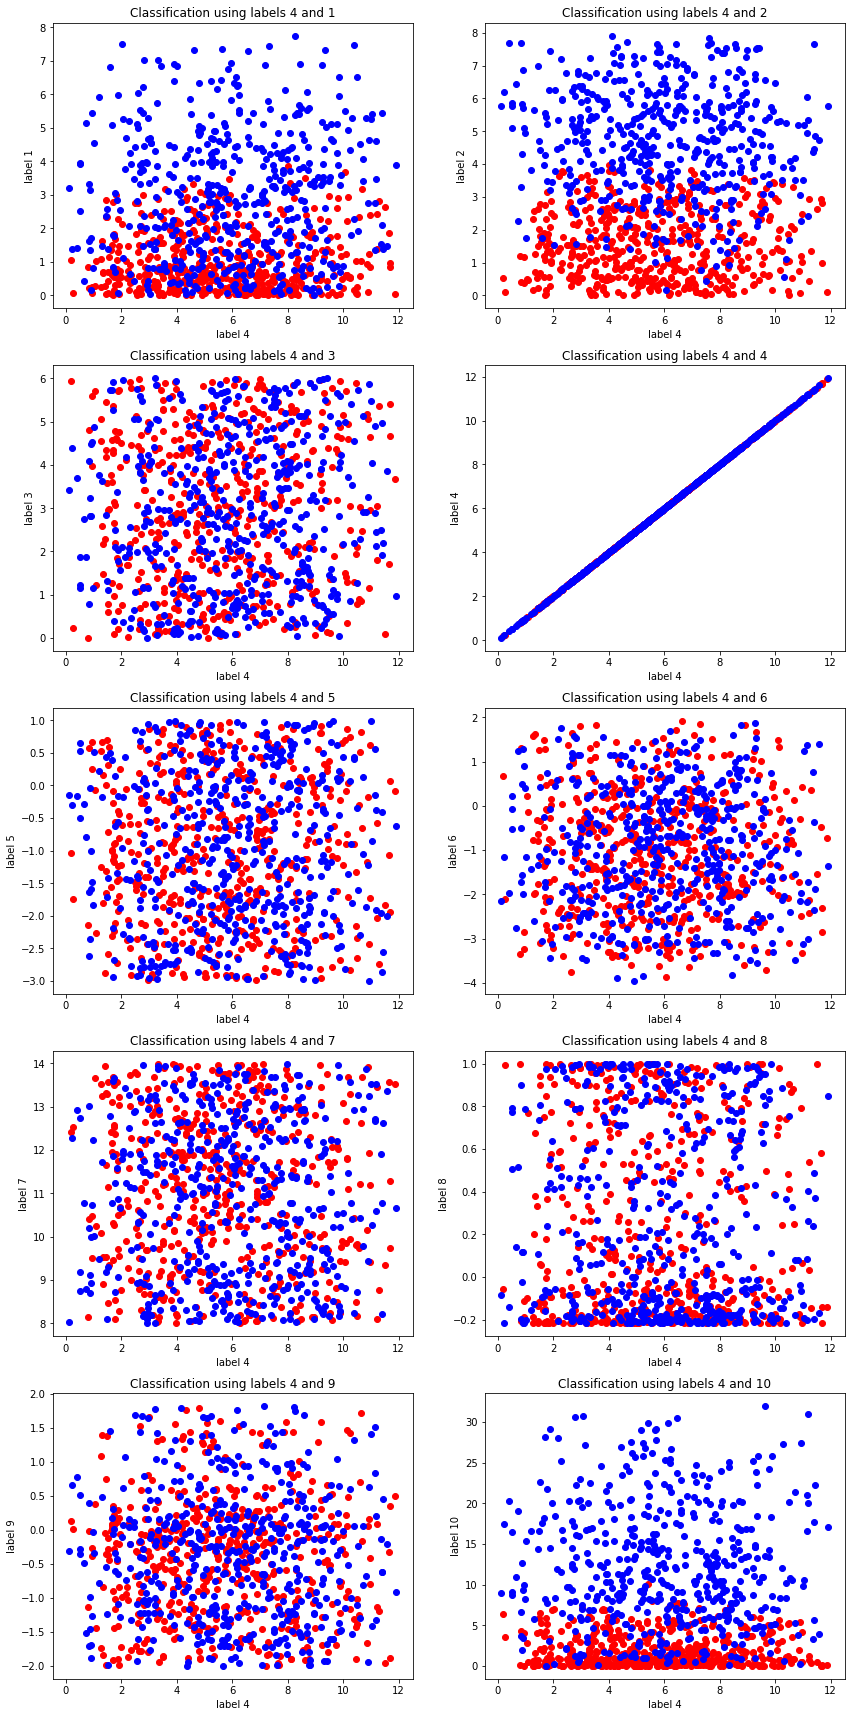

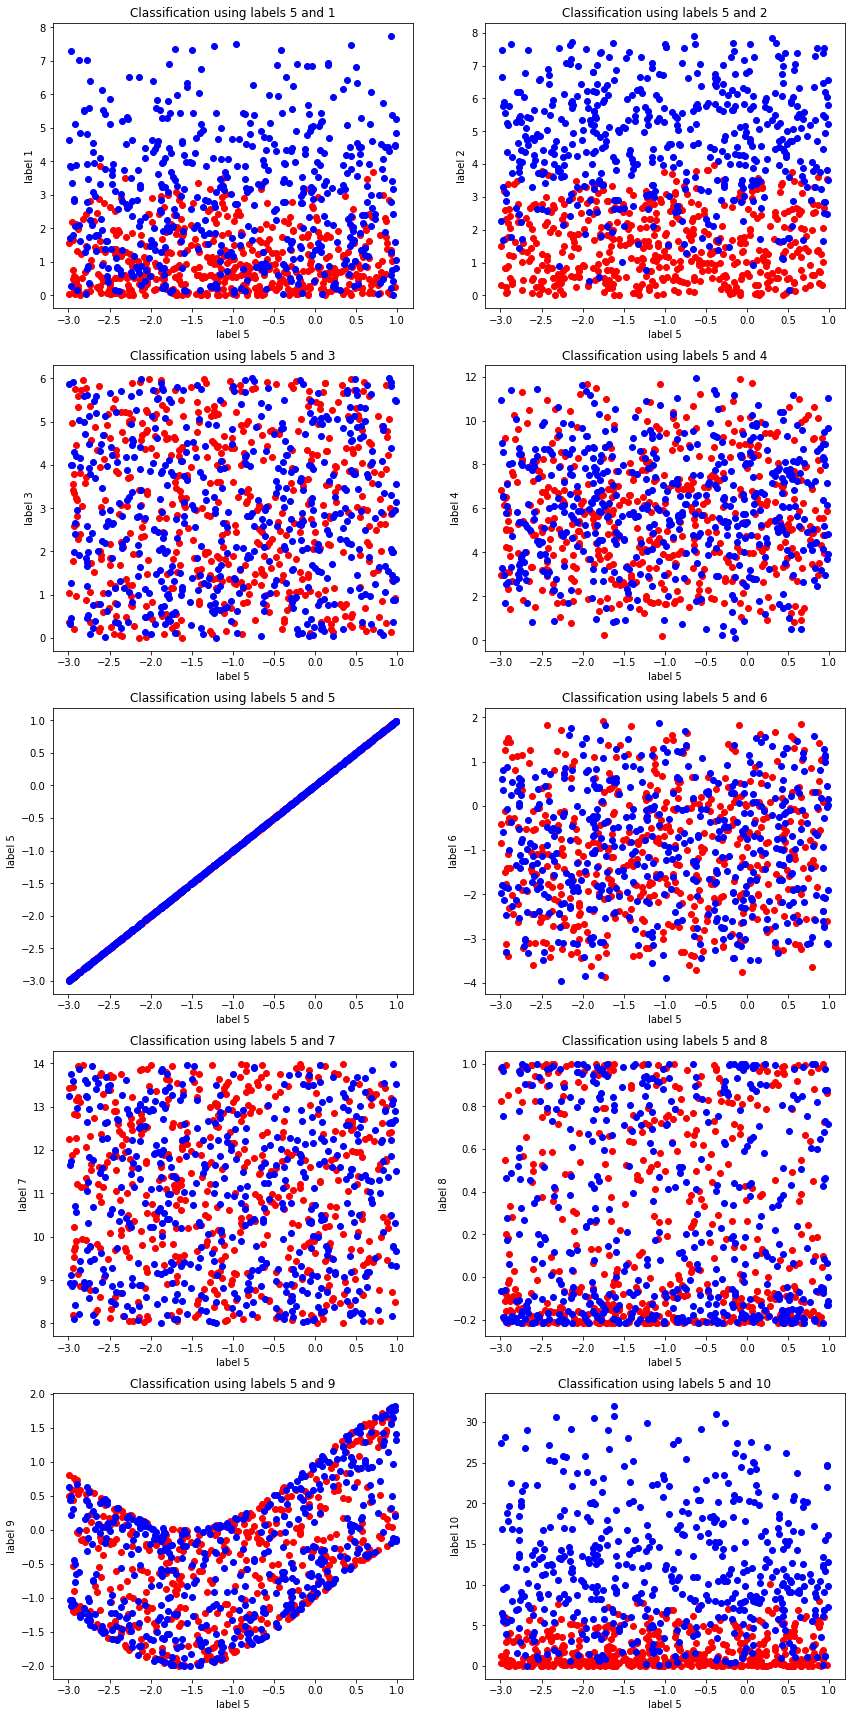

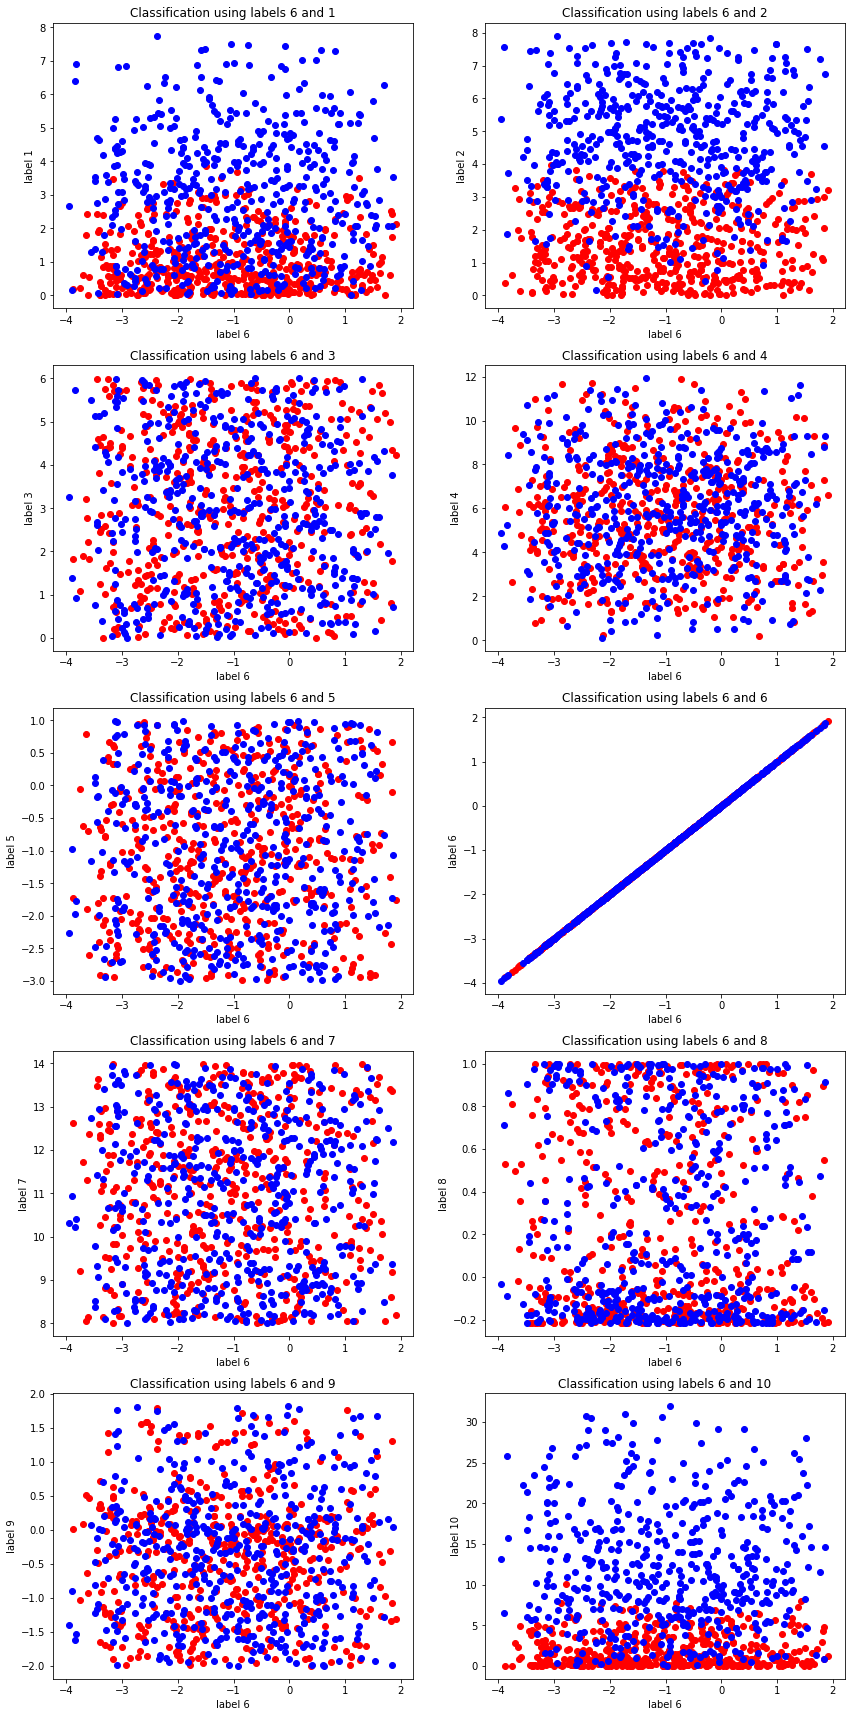

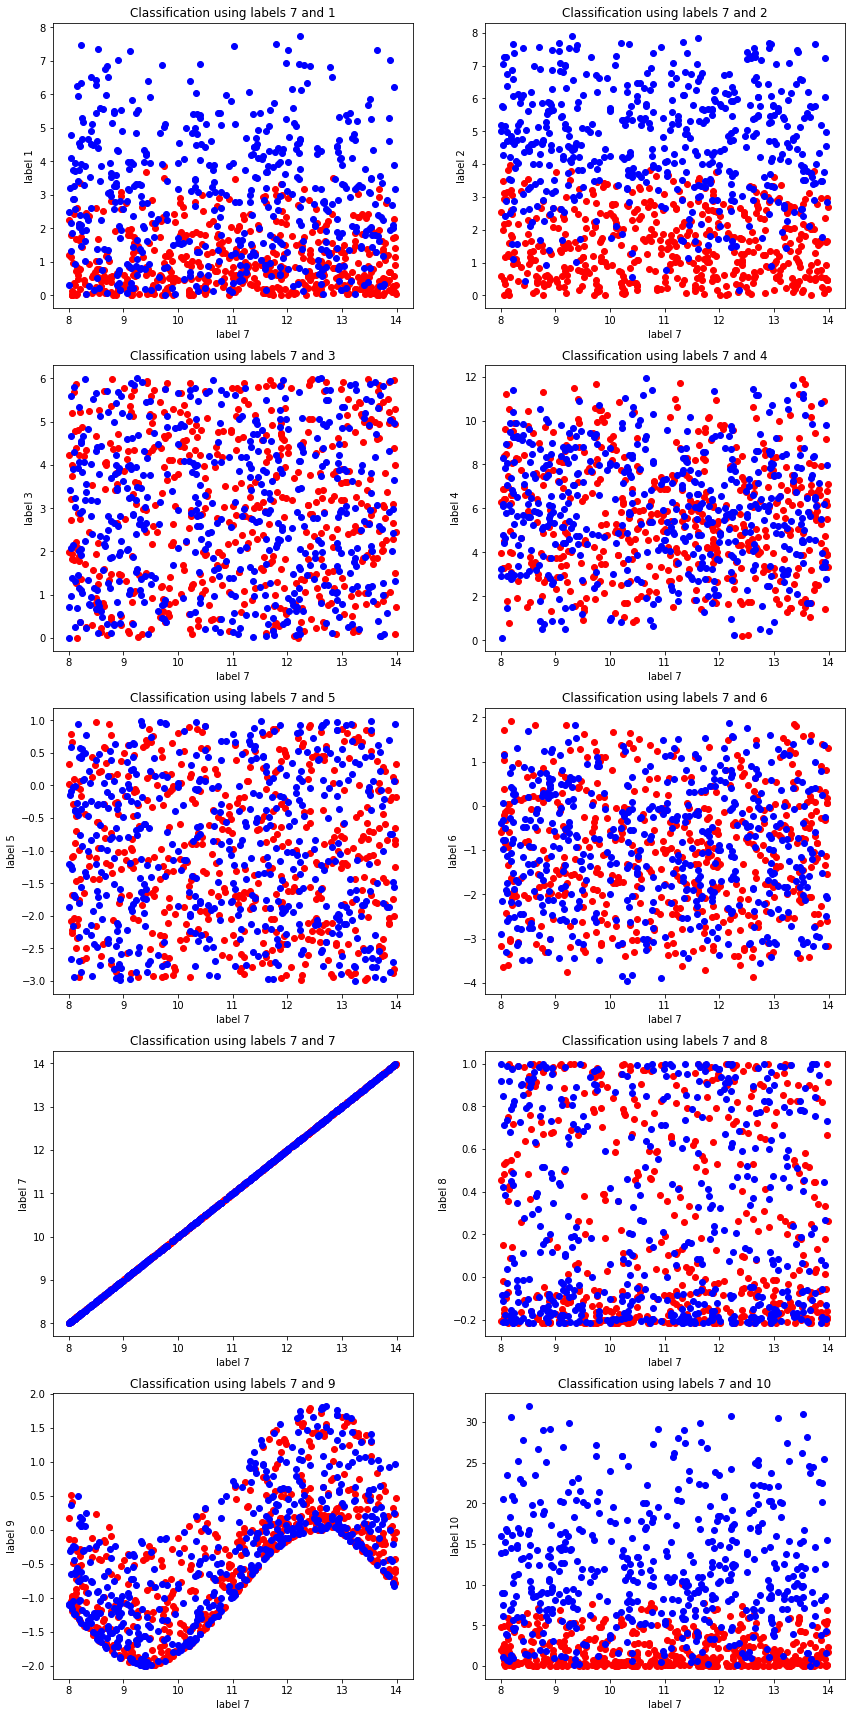

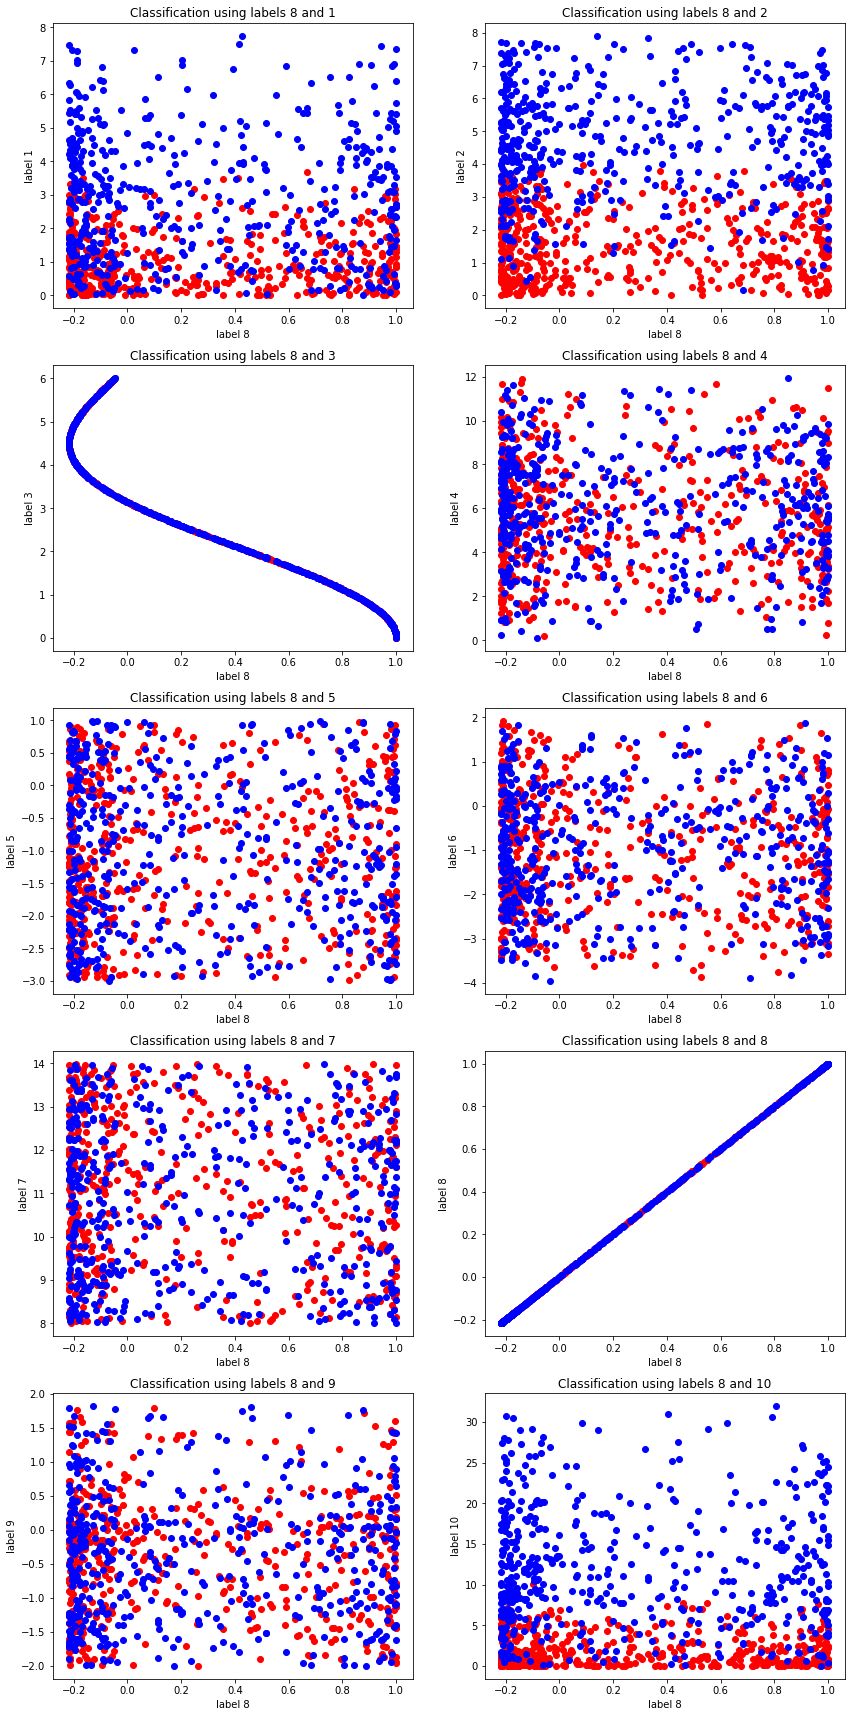

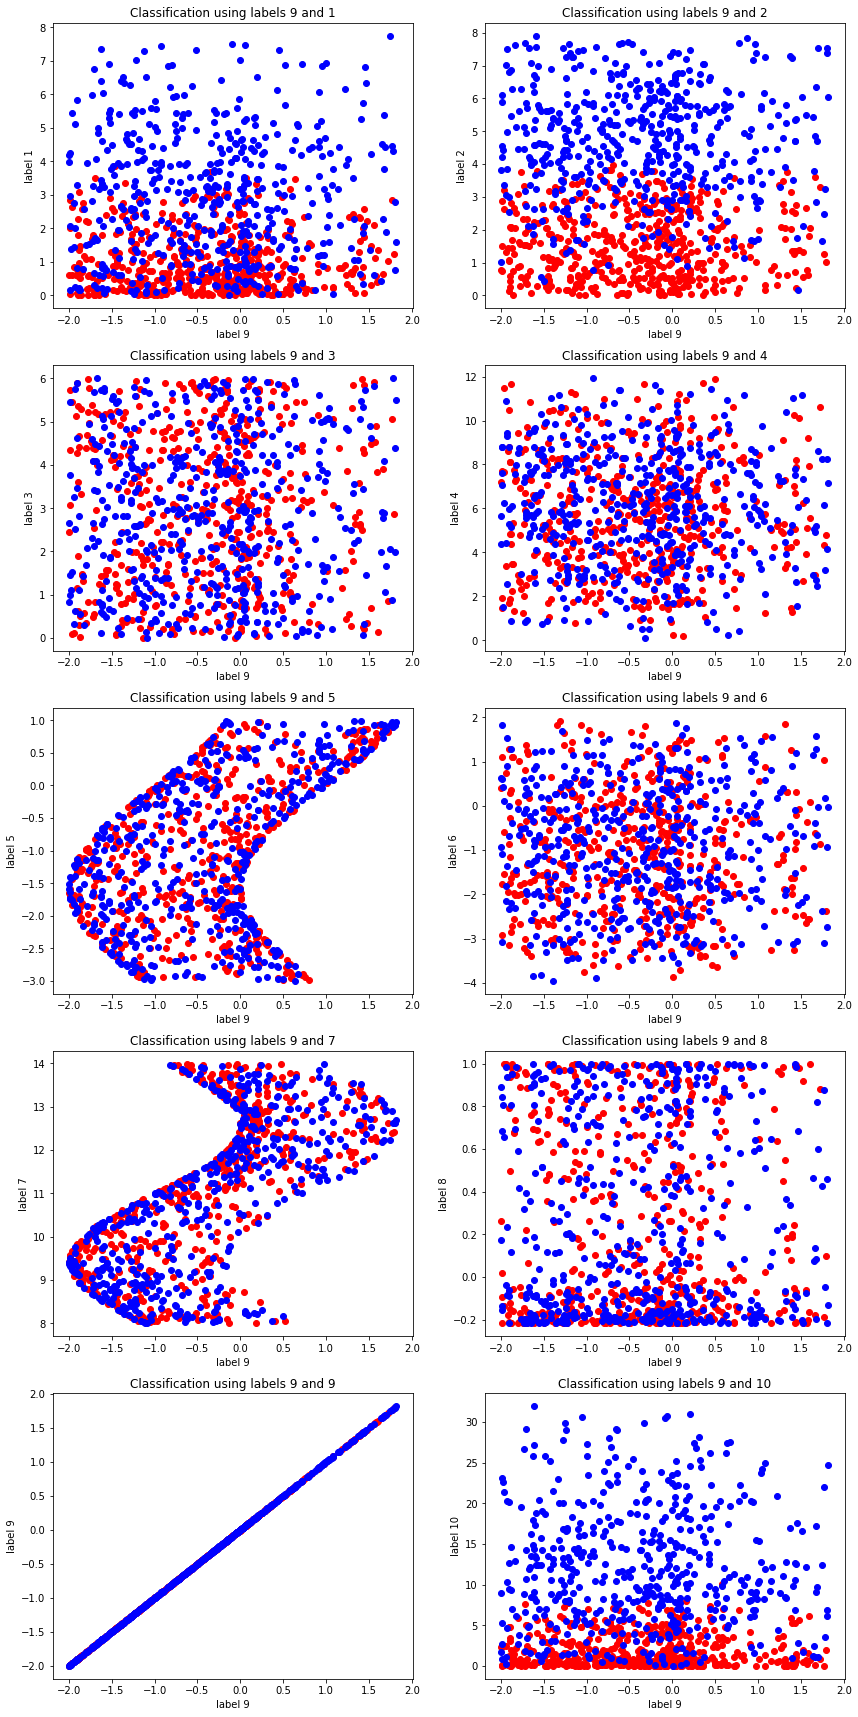

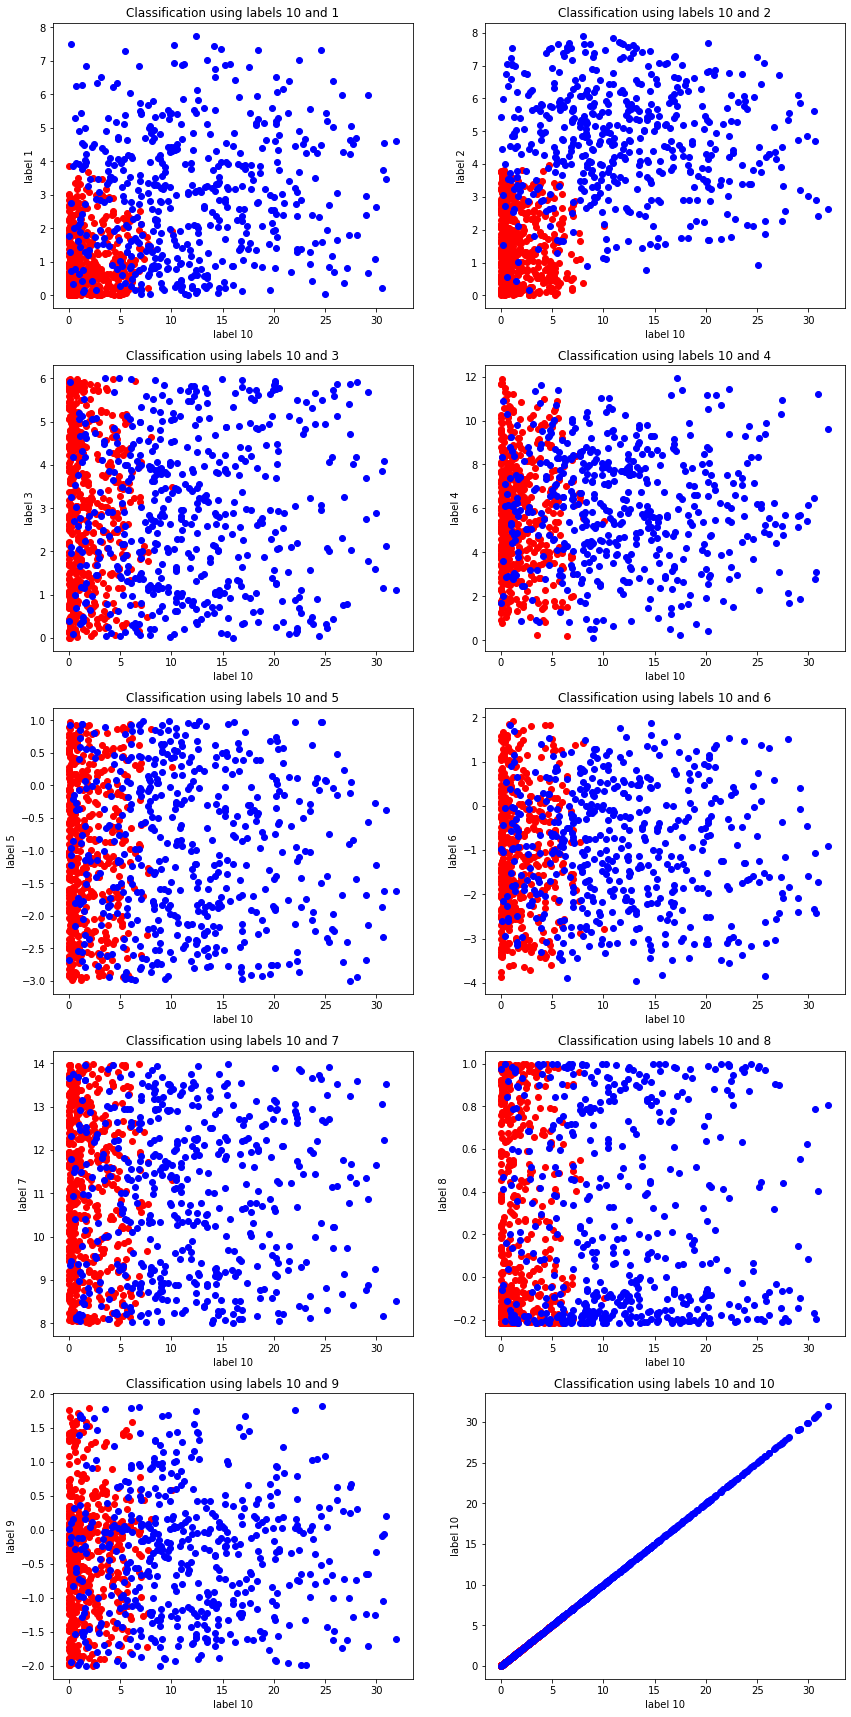

In [8]:
# To see all the graphs at once
for var in range(1,11):
    fig = plt.figure(figsize=(8, 8))
    for i in range(10):
        plt.subplot(5,2,i+1)
        plt.subplots_adjust(bottom=0.125, right=1.5, top=3)
        plotdata(var,i+1,X,y)
        #plt.xticks([]) , plt.yticks([])

In [ ]:
"""Find the two features which can classify the two labels perfectly."""

We can clearly observe that, the data gets best clustered when the plot is between label 1 and label 2

HENCE THE ANSWER IS LABEL 1 AND LABEL 2


In [18]:
# applying PCA
X_values=X[1:,:]
y_values-y[1:]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_values[:,0:2])
print(principalComponents)
pca.explained_variance_ratio_

[[ 2.91674928 -0.05469208]
 [-2.74616607  0.26891885]
 [ 2.51295558 -1.86206798]
 ...
 [-2.42346822 -0.1188318 ]
 [-3.57510428 -0.48448531]
 [ 3.20656986  0.56045619]]


array([0.6297216, 0.3702784])

Text(0.5, 1.0, 'PC Feature 1 and 2')

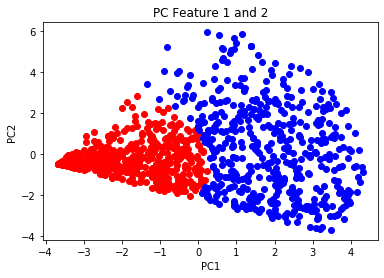

In [20]:
one = y_values==1
two = y_values==2
plt.plot(principalComponents[one,0],principalComponents[one,1],'ro')
plt.plot(principalComponents[two,0],principalComponents[two,1],'bo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC Feature 1 and 2')

In [21]:
# we can check that the above correctly produces clusters of the data for label 1 and label 2

SyntaxError: invalid syntax (<ipython-input-21-f7de5a07ebb9>, line 1)

In [23]:
print(np.var(principalComponents,axis=0))

[4.7109506  2.77005465]
